# Digital Assessment 1: Exploratory Data Analysis (EDA)

**Developed by: Vanga Naveen Kumar Reddy**


### Step 1: Data Loading & Exploration

We will begin by loading the dataset and performing basic exploration to check its dimensions and initial structure.
    

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('diabetes.csv')

# Dataset dimensions and summary
print("Dataset Dimensions:", df.shape)
df.info()
    

Dataset Dimensions: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 54.1+ KB



### Step 2: Checking for Missing Values and Data Cleaning

We will now check for any missing values in the dataset. In case of missing data, we will employ appropriate handling strategies.
    

In [3]:

# Checking for missing values
missing_data = df.isnull().sum()
print("Missing Values:", missing_data)

# Removing duplicate records
initial_shape = df.shape
df.drop_duplicates(inplace=True)
print(f"Duplicate records removed: {initial_shape[0] - df.shape[0]}")
    

Missing Values: Pregnancies                 1
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    1
Age                         0
Outcome                     0
dtype: int64
Duplicate records removed: 0



### Step 3: Data Transformation and Feature Engineering

We apply transformations like binning for the 'Glucose' feature and scale other continuous variables to prepare for further analysis.
    

In [4]:

# Binning the 'Glucose' column
df['Glucose_Binned'] = pd.cut(df['Glucose'], bins=[0, 100, 140, 200], labels=['Low', 'Normal', 'High'])

# Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Glucose_Scaled', 'Insulin_Scaled', 'Age_Scaled']] = scaler.fit_transform(df[['Glucose', 'Insulin', 'Age']])

print(df[['Glucose_Binned', 'Glucose_Scaled', 'Insulin_Scaled', 'Age_Scaled']].head())
    

  Glucose_Binned  Glucose_Scaled  Insulin_Scaled  Age_Scaled
0           High        0.848324       -0.692891    1.425995
1            Low       -1.123396       -0.692891   -0.190672
2           High        1.943724       -0.692891   -0.105584
3            Low       -0.998208        0.123302   -1.041549
4         Normal        0.504055        0.765836   -0.020496



### Step 4: Univariate, Bivariate, and Multivariate Analysis

We will perform univariate, bivariate, and multivariate analyses to explore relationships and patterns in the dataset.
    

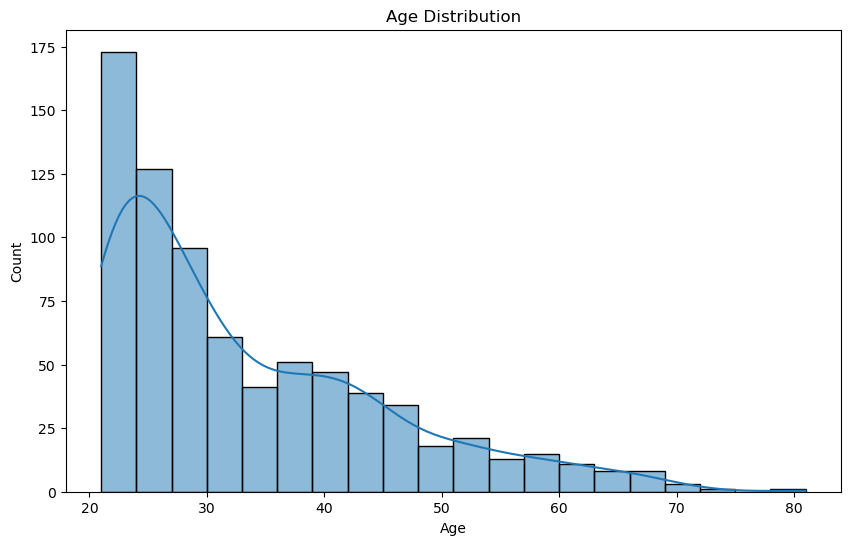

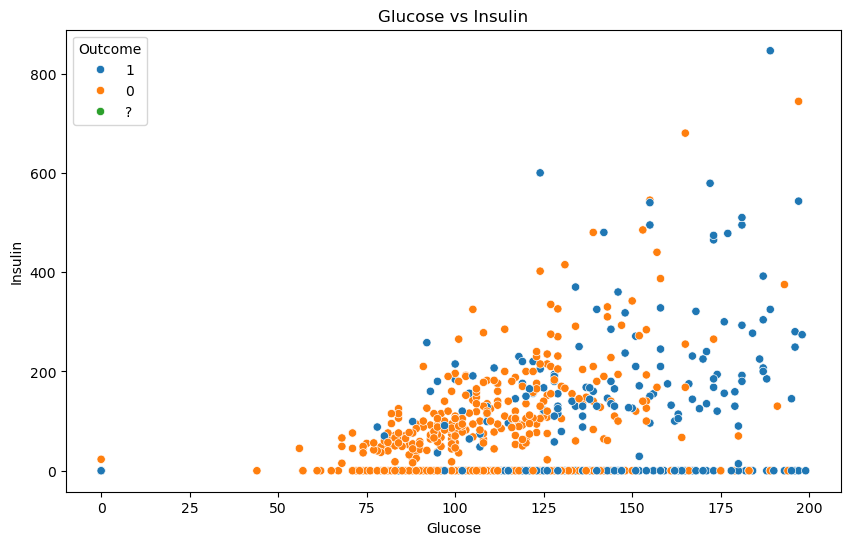

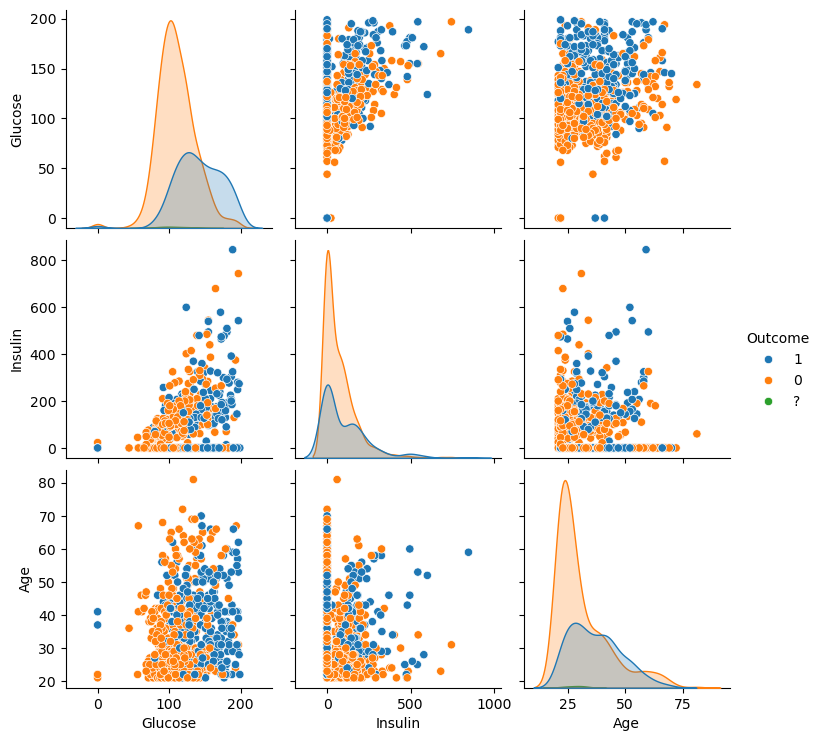

In [5]:

# Univariate Analysis: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

# Bivariate Analysis: Glucose vs Insulin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=df)
plt.title('Glucose vs Insulin')
plt.show()

# Multivariate Analysis: Pairplot between variables
sns.pairplot(df[['Glucose', 'Insulin', 'Age', 'Outcome']], hue='Outcome')
plt.show()
    


### Step 5: Correlation Matrix and Statistical Summary

We calculate the correlation matrix and provide a statistical summary including additional metrics like variance, skewness, and kurtosis.
    

/var/folders/nn/bh0xltz959n0bq5924d5mzl80000gn/T/ipykernel_48630/3373164266.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns].fillna(df[numeric_columns].mean(), inplace=True)


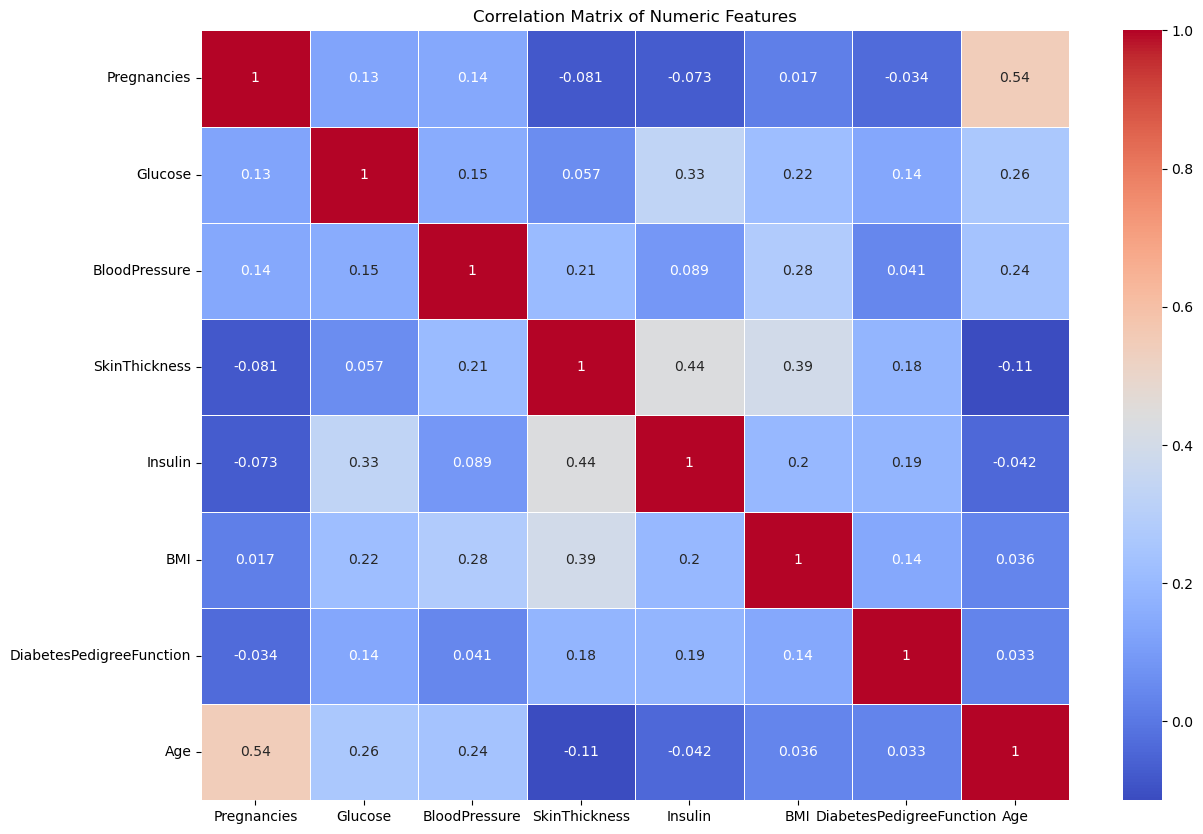

                          count        mean         std     min      25%  \
Pregnancies               767.0    3.850065    3.368910   0.000   1.0000   
Glucose                   768.0  120.894531   31.972618   0.000  99.0000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.0000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.0000   
Insulin                   768.0   79.799479  115.244002   0.000   0.0000   
BMI                       768.0   31.992578    7.884160   0.000  27.3000   
DiabetesPedigreeFunction  767.0    0.471995    0.331529   0.078   0.2435   
Age                       768.0   33.240885   11.760232  21.000  24.0000   

                              50%       75%     max      variance  skewness  \
Pregnancies                 3.000    6.0000   17.00     11.349553  0.900862   
Glucose                   117.000  140.2500  199.00   1022.248314  0.173754   
BloodPressure              72.000   80.0000  122.00    374.647271 -1.843608   

In [6]:

# Replace '?' with NaN and handle missing values
df.replace('?', np.nan, inplace=True)

numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df[numeric_columns].fillna(df[numeric_columns].mean(), inplace=True)

# Correlation Matrix
plt.figure(figsize=(14, 10))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Statistical Summary
summary = df[numeric_columns].describe().T
summary['variance'] = df[numeric_columns].var()
summary['skewness'] = df[numeric_columns].skew()
summary['kurtosis'] = df[numeric_columns].kurt()
print(summary)
    


### Step 6: Clustering and Outlier Detection

We apply KMeans clustering to detect outliers and visualize the results.
    

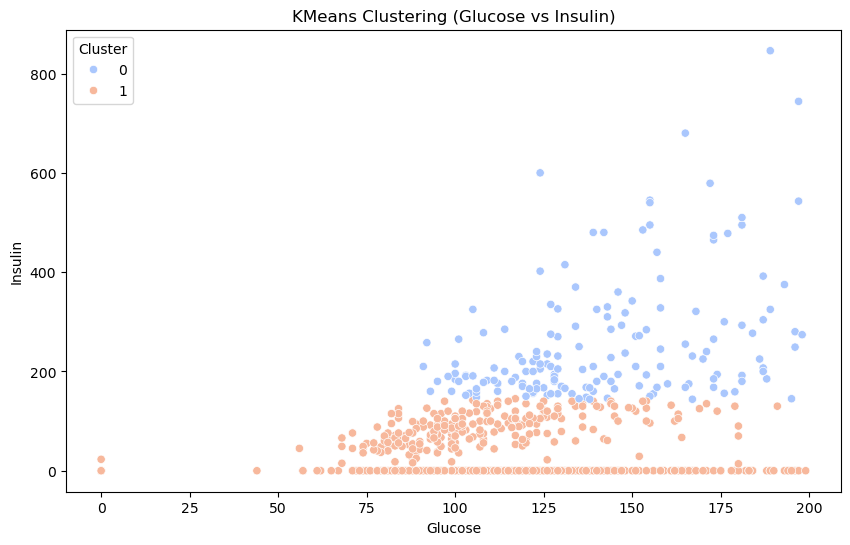

In [7]:

from sklearn.cluster import KMeans

# Applying KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Glucose', 'Insulin', 'Age']])

# Visualizing Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='Insulin', hue='Cluster', data=df, palette='coolwarm')
plt.title('KMeans Clustering (Glucose vs Insulin)')
plt.show()
    


### Step 7: Dimensionality Reduction Using Principal Component Analysis (PCA)

We apply PCA to reduce the dimensionality of the dataset and visualize the results.
    

Remaining missing values in 'Outcome': 0


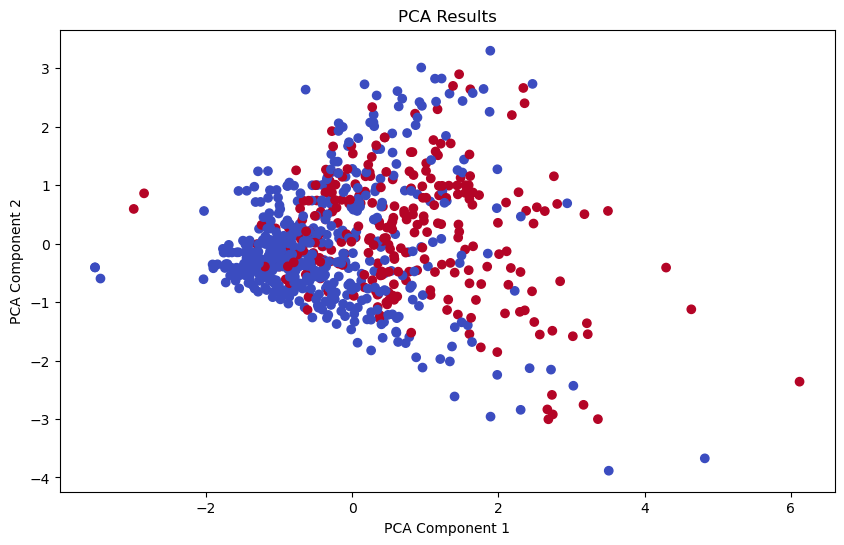

In [9]:

from sklearn.decomposition import PCA

# PCA on scaled data
scaled_features = scaler.fit_transform(df[['Glucose', 'Insulin', 'Age']])
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Handling missing values in the 'Outcome' column
if df['Outcome'].isnull().sum() > 0:
    # Fill missing values in 'Outcome' with mode (most frequent value)
    df['Outcome'].fillna(df['Outcome'].mode()[0], inplace=True)

# Ensure no NaN values in 'Outcome' after filling
print(f"Remaining missing values in 'Outcome': {df['Outcome'].isnull().sum()}")

# Now, retry the scatter plot with 'Outcome' as hue
plt.figure(figsize=(10, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Outcome'].astype(float), cmap='coolwarm')
plt.title('PCA Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
